In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd

# Update the path if needed
df = pd.read_csv("/home/shruti/Desktop/creditcard.csv")


In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (284807, 30)
y shape: (284807,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Class
0    199020
1       344
Name: count, dtype: int64

Test set class distribution:
Class
0    85295
1      148
Name: count, dtype: int64


# Stratified splitting preserves the original class imbalance in both training and test sets, ensuring fair model evaluation.

In [5]:
scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])


# Only the Amount feature was standardized since the remaining features were already PCA-transformed.

In [6]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

After SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


# SMOTE balances the training dataset by generating synthetic fraud samples, allowing the model to learn meaningful fraud patterns without bias toward legitimate transactions.

In [7]:
print("X_train_res shape:", X_train_res.shape)
print("y_train_res shape:", y_train_res.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_res shape: (398040, 30)
y_train_res shape: (398040,)
X_test shape: (85443, 30)
y_test shape: (85443,)


In [8]:
print("Training data shape:", X_train_res.shape)
print("Training labels shape:", y_train_res.shape)

print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

print("\nTraining class distribution:")
print(y_train_res.value_counts())

print("\nTest class distribution:")
print(y_test.value_counts())


Training data shape: (398040, 30)
Training labels shape: (398040,)
Test data shape: (85443, 30)
Test labels shape: (85443,)

Training class distribution:
Class
0    199020
1    199020
Name: count, dtype: int64

Test class distribution:
Class
0    85295
1      148
Name: count, dtype: int64


In [10]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [11]:
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_res, y_train_res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [13]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[84551,   744],
       [   22,   126]])

In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.85      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443



In [15]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9647815688952331


In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


In [18]:
rf.fit(X_train_res, y_train_res)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf


array([[85272,    23],
       [   30,   118]])

In [21]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)


Random Forest ROC-AUC: 0.9665881368794786


In [23]:
from xgboost import XGBClassifier


In [24]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [25]:
xgb.fit(X_train_res, y_train_res)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [26]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb


array([[85273,    22],
       [   27,   121]])

In [28]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.82      0.83       148

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC:", roc_auc_xgb)


XGBoost ROC-AUC: 0.9773236129616926


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve
)


In [31]:
# ROC curve data
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


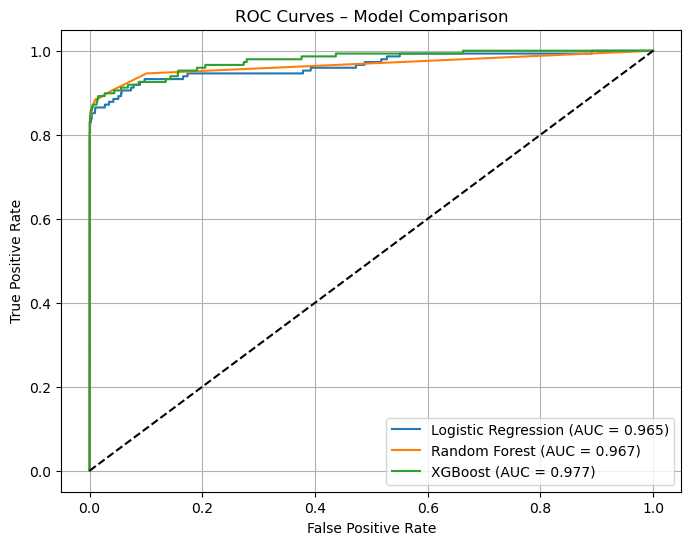

In [32]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)


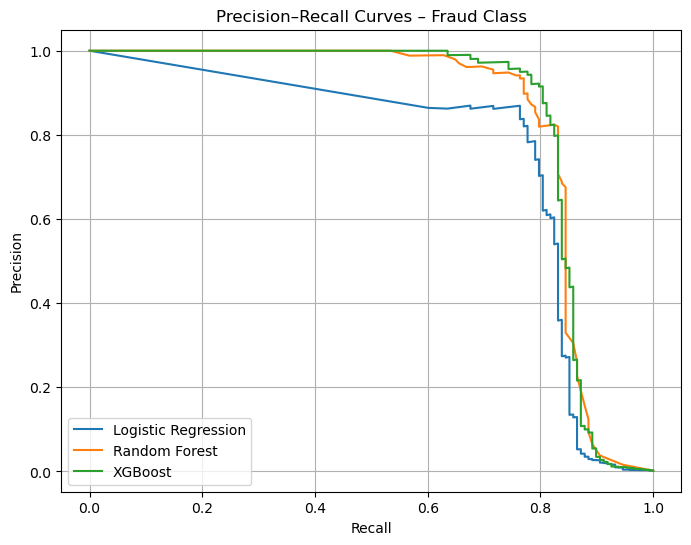

In [34]:
plt.figure(figsize=(8,6))

plt.plot(rec_lr, prec_lr, label="Logistic Regression")
plt.plot(rec_rf, prec_rf, label="Random Forest")
plt.plot(rec_xgb, prec_xgb, label="XGBoost")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Fraud Class")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [roc_auc_lr, roc_auc_rf, roc_auc_xgb],
    "Fraud Recall": [0.85, 0.80, 0.82],
    "Fraud Precision": [0.14, 0.84, 0.85],
    "False Positives": [744, 23, 22]
})

results


,Model,ROC-AUC,Fraud Recall,Fraud Precision,False Positives
0,Logistic Regression,0.964782,0.85,0.14,744
1,Random Forest,0.966588,0.80,0.84,23
2,XGBoost,0.977324,0.82,0.85,22
